<h1>Load the Data</h1>

In [2]:
from sklearn import datasets
# import some data to play with
iris = datasets.load_iris()

print '*'*10, 'DATA', '*'*10

print iris['feature_names']
for i, row in enumerate(iris['data']):
    print row, '->', iris['target_names'][iris['target'][i]]

********** DATA **********
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[ 5.1  3.5  1.4  0.2] -> setosa
[ 4.9  3.   1.4  0.2] -> setosa
[ 4.7  3.2  1.3  0.2] -> setosa
[ 4.6  3.1  1.5  0.2] -> setosa
[ 5.   3.6  1.4  0.2] -> setosa
[ 5.4  3.9  1.7  0.4] -> setosa
[ 4.6  3.4  1.4  0.3] -> setosa
[ 5.   3.4  1.5  0.2] -> setosa
[ 4.4  2.9  1.4  0.2] -> setosa
[ 4.9  3.1  1.5  0.1] -> setosa
[ 5.4  3.7  1.5  0.2] -> setosa
[ 4.8  3.4  1.6  0.2] -> setosa
[ 4.8  3.   1.4  0.1] -> setosa
[ 4.3  3.   1.1  0.1] -> setosa
[ 5.8  4.   1.2  0.2] -> setosa
[ 5.7  4.4  1.5  0.4] -> setosa
[ 5.4  3.9  1.3  0.4] -> setosa
[ 5.1  3.5  1.4  0.3] -> setosa
[ 5.7  3.8  1.7  0.3] -> setosa
[ 5.1  3.8  1.5  0.3] -> setosa
[ 5.4  3.4  1.7  0.2] -> setosa
[ 5.1  3.7  1.5  0.4] -> setosa
[ 4.6  3.6  1.   0.2] -> setosa
[ 5.1  3.3  1.7  0.5] -> setosa
[ 4.8  3.4  1.9  0.2] -> setosa
[ 5.   3.   1.6  0.2] -> setosa
[ 5.   3.4  1.6  0.4] -> setosa
[ 5.2  3.5  1.5  0.2] -> s

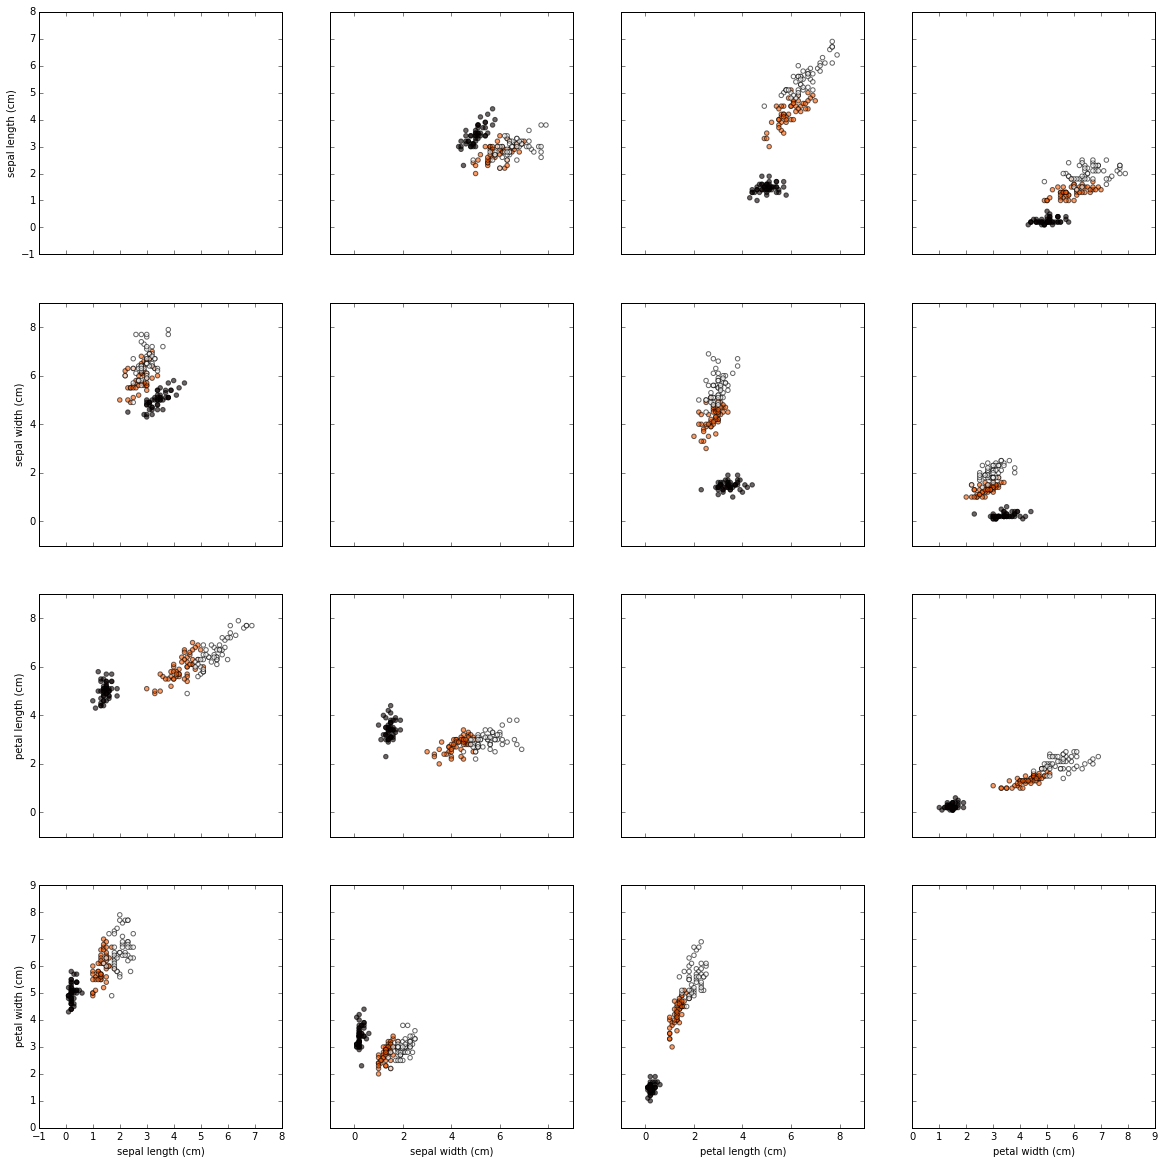

In [3]:
import matplotlib.pyplot as pyplot
%matplotlib inline
f, axes = pyplot.subplots(4, 4, sharex='col', sharey='row')
f.set_size_inches(20,20)
data_transpose = iris['data'].T

#Plot every pair of axes against each other (twice...!)
for i in xrange(4):
    for j in xrange(4):
        if i != j:
            axes[i][j].scatter(data_transpose[i], data_transpose[j], c=iris['target'], alpha=0.6, cmap=pyplot.cm.get_cmap(name='hot'), label='Generated Data')
        if i == 3:
            axes[i][j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            axes[i][j].set_ylabel(iris['feature_names'][i])

<h1>Split the data into a test and training set</h1>

In [4]:
import numpy as np

rand_indices = np.arange(len(iris['data']))
np.random.shuffle(rand_indices)

x = np.zeros((len(iris['data']), len(iris['data'][0])))
y = np.zeros(len(iris['data']))

for i, val in enumerate(rand_indices):
    x[i] = iris['data'][val]
    y[i] = iris['target'][val]

print 'Total number of data points', len(x)
    
x_train = x[:-15]
y_train = y[:-15]

x_test = x[len(x)-15:]
y_test = y[len(y)-15:]

print 'Number of training data points', len(x_train)
print 'Number of test data points', len(x_test)

Total number of data points 150
Number of training data points 135
Number of test data points 15


<h1>Train a Model on the Training set</h1>

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(x_train, y_train)

print 'TRAINING RESULTS'
print classification_report(y_train, model.predict(x_train))

TRAINING RESULTS
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        47
        1.0       1.00      0.86      0.92        42
        2.0       0.88      1.00      0.94        46

avg / total       0.96      0.96      0.96       135



<h1>Test the Model on the Test Set</h1>

In [6]:
print 'TEST RESULTS'
print classification_report(y_test, model.predict(x_test))

TEST RESULTS
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00         3
        1.0       1.00      0.75      0.86         8
        2.0       0.67      1.00      0.80         4

avg / total       0.91      0.87      0.87        15



<h1>Look at How Model is Transforming the Data</h1>

In [11]:
print '*'*10, 'Coefficients', '*'*10
print model.coef_
print
print '*'*10, 'Intercepts', '*'*10
print model.intercept_

mapped_values = [0,0,0]
#Skew the data using these linear functions
for i in xrange(3):
    mapped_values[i] = np.sum(model.coef_[i]*x, axis=1) + model.intercept_[i]

********** Coefficients **********
[[ 0.38986582  1.45877436 -2.20705645 -1.00250629]
 [ 0.59965777 -1.81558003  0.49097542 -1.37392037]
 [-1.57379399 -1.48956785  2.33195361  2.40904199]]

********** Intercepts **********
[ 0.2615526   0.88902852 -1.12544914]


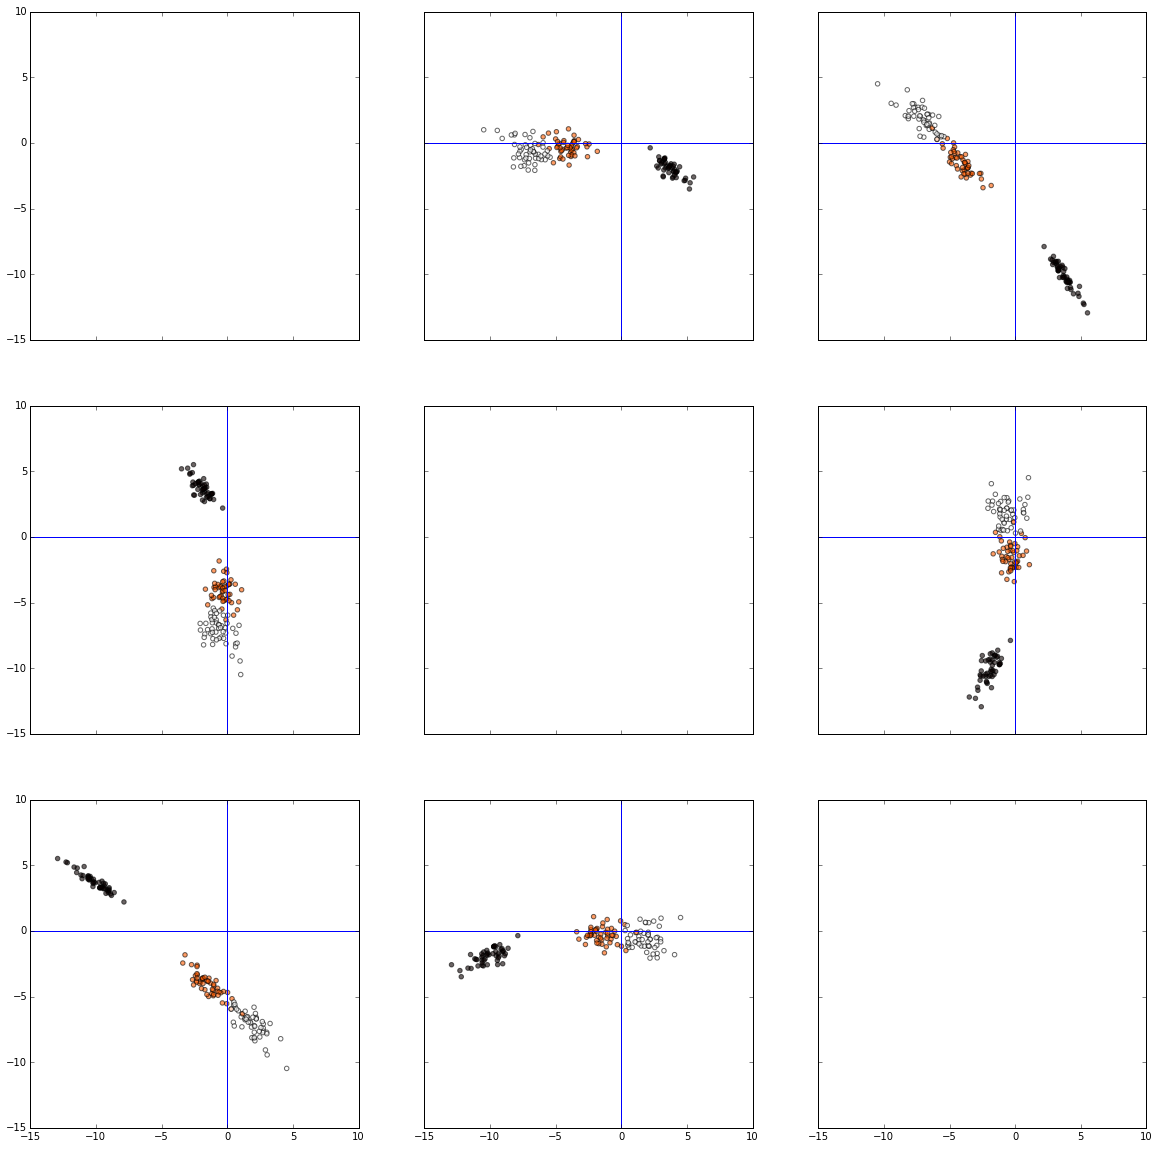

In [12]:
import matplotlib.pyplot as pyplot
%matplotlib inline
f, axes = pyplot.subplots(3, 3, sharex='col', sharey='row')
f.set_size_inches(20,20)
data_transpose = iris['data'].T

#Plot every pair of output functions against each other (twice)
for i in xrange(3):
    for j in xrange(3):
        
        if i != j:
            axes[i][j].axhline(y=0)
            axes[i][j].axvline(x=0)
            axes[i][j].scatter(mapped_values[i], mapped_values[j], c=y, alpha=0.6, cmap=pyplot.cm.get_cmap(name='hot'), label='Generated Data')